In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
players_salary=pd.read_csv("nba2k20-full.csv")

In [4]:
players_salary.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [27]:
players_salary.shape

(429, 14)

Total there are 14 Columns and 429 rows in the given data set

In [8]:
players_salary.isnull().sum()

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        66
dtype: int64

There are onlt 2 Columns (team and college) where there is missing values hence we need to replace it or remove it on the basis on data distrbution in feature Engineering part.

In [9]:
players_salary.describe()

,rating,draft_year
count,429.000000,429.000000
mean,76.372960,2014.093240
std,5.657748,3.937678
min,67.000000,2001.000000
25%,72.000000,2012.000000
50%,75.000000,2015.000000
75%,79.000000,2017.000000
max,97.000000,2019.000000


In [17]:
players_salary['rating'].value_counts().sort_index()

67     1
68     7
69    11
70    24
71    26
72    44
73    43
74    35
75    35
76    39
77    27
78    25
79    22
80    10
81     9
82     8
83     9
84     5
85    10
86     8
87    11
88     5
89     2
90     2
91     2
92     1
93     1
94     1
95     1
96     3
97     2
Name: rating, dtype: int64

As Rating feature is nominal feature hence we can quantify and in Feature Engineering part we can convert rating feature into various category 
rating>90--> best  rating >80 and rating<=90 -->very good    rating >70 and rating<=80 -->good   rating >60 and rating<=70-- average

In [19]:
players_salary['position'].value_counts().sort_index()

C       48
C-F      6
F      138
F-C     36
F-G     13
G      169
G-F     19
Name: position, dtype: int64

In [20]:
players_salary['height'].value_counts().sort_index()

5-10 / 1.78     1
5-11 / 1.80     3
5-9 / 1.75      1
6-0 / 1.83      9
6-1 / 1.85     21
6-10 / 2.08    38
6-11 / 2.11    27
6-2 / 1.88     10
6-3 / 1.91     38
6-4 / 1.93     35
6-5 / 1.96     45
6-6 / 1.98     50
6-7 / 2.01     44
6-8 / 2.03     47
6-9 / 2.06     32
7-0 / 2.13     22
7-1 / 2.16      3
7-2 / 2.18      1
7-3 / 2.21      1
7-4 / 2.24      1
Name: height, dtype: int64

In [21]:
players_salary['rating'].describe()

count    429.000000
mean      76.372960
std        5.657748
min       67.000000
25%       72.000000
50%       75.000000
75%       79.000000
max       97.000000
Name: rating, dtype: float64

In [23]:
players_salary.dtypes

full_name      object
rating          int64
jersey         object
team           object
position       object
b_day          object
height         object
weight         object
salary         object
country        object
draft_year      int64
draft_round    object
draft_peak     object
college        object
dtype: object

All the feature are object type except rating and draft_year these are integer type.

In [26]:
players_salary['draft_round'].value_counts()

1            257
2            105
Undrafted     67
Name: draft_round, dtype: int64

# Exploratory Data Analysis

In [28]:
players_salary.columns

Index(['full_name', 'rating', 'jersey', 'team', 'position', 'b_day', 'height',
       'weight', 'salary', 'country', 'draft_year', 'draft_round',
       'draft_peak', 'college'],
      dtype='object')

Let's Explore featrue one by one 

## EDA for Numerical Fetaure

## rating

Text(0.5, 1.0, 'rating distribution')

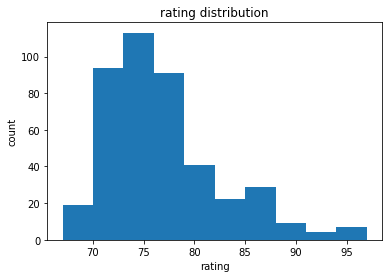

In [36]:
plt.hist('rating',data=players_salary);
plt.xlabel('rating')
plt.ylabel('count')
plt.title("rating distribution")

In [37]:
players_salary['rating'].describe()

count    429.000000
mean      76.372960
std        5.657748
min       67.000000
25%       72.000000
50%       75.000000
75%       79.000000
max       97.000000
Name: rating, dtype: float64

From above graph we can say data is right skewed and Positive Skewness hence we can use Logarthmic Transformation or Square Root Transformation to convert into normal distribution

<AxesSubplot:xlabel='rating'>

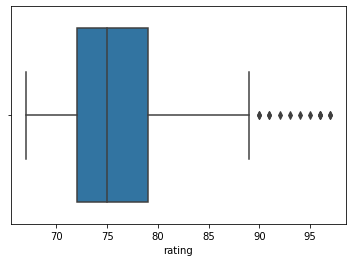

In [41]:
sns.boxplot(x='rating',data=players_salary)


by seeing boxplot we can see there are some outliers in rating feature which we can reduce after transforming data.

# #draft_year

Text(0.5, 1.0, 'draft_year distribution')

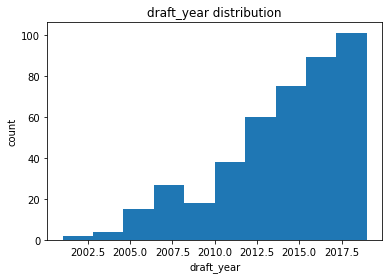

In [49]:
plt.hist('draft_year',data=players_salary);
plt.xlabel('draft_year')
plt.ylabel('count')
plt.title("draft_year distribution")

In [50]:
players_salary['draft_year'].describe()

count     429.000000
mean     2014.093240
std         3.937678
min      2001.000000
25%      2012.000000
50%      2015.000000
75%      2017.000000
max      2019.000000
Name: draft_year, dtype: float64

we can see it is negative skewed or left skewed hence we can use Exponential Transformation or Power Transformation in order to conver data to normal distribution

<AxesSubplot:xlabel='draft_year'>

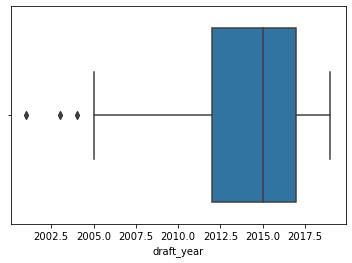

In [51]:
sns.boxplot(x='draft_year',data=players_salary)


there are very less number of outlier in draft_year feature we will replace with some value so that it will get adjusted .

## EDA for Categorical Feature